## *Evaluation exercises*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

import wrangle as wr
import explore as ex

1. **Load your ```zillow``` dataset.**

In [8]:
df = wr.get_zillow()

In [9]:
train, validate, test = wr.split_zillow(df)

In [10]:
def full_split(train, validate, test, target): # add to wrangle.py!
    '''
    accepts train, validate, test data sets and the name of the target variable as a parameter
    splits the data frame into:
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    #train, validate, test = train_validate_test_split(df, target)

    #save target column
    y_train = train[target]
    y_validate = validate[target]
    y_test = test[target]

    #remove target column from the sets
    train.drop(columns = target, inplace=True)
    validate.drop(columns = target, inplace=True)
    test.drop(columns = target, inplace=True)

    return train, validate, test, y_train, y_validate, y_test

In [11]:
X_train, X_validate, X_test, y_train, y_validate, y_test = full_split(train, validate, test, 'home_value')

2. **Fit a linear regression model (ordinary least squares) and compute ```yhat```, predictions of ```taxvaluedollarcnt``` using only ```calculatedfinishedsqft```.**

Here is some sample code to get you started:
```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```
Modify and add to the code above as necessary for it to work with the zillow dataset.

In [13]:
# we can fit X_train[['sq_feet']] or X['sq_feet'].values.reshape(-1, 1)
model = LinearRegression().fit(X_train.sq_feet.values.reshape(-1, 1), y_train)

In [16]:
predictions = model.predict(X_train.sq_feet.values.reshape(-1, 1))

In [17]:
residuals = y_train - predictions

3. **Plot the residuals for the linear regression model that you made.**

In [18]:
baseline = y_train.mean()

In [19]:
evaluation = pd.DataFrame()

In [20]:
evaluation = pd.DataFrame(X_train.loc[:, 'sq_feet'])
evaluation['actual'] = y_train
evaluation['baseline'] = baseline
evaluation['predictions'] = predictions
evaluation['residuals'] = residuals

In [21]:
evaluation['bl_residuals'] = y_train - baseline

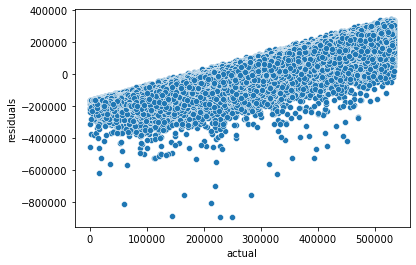

In [23]:
sns.scatterplot(data=evaluation, x='actual', y='residuals');

4. **Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**

In [24]:
# sum of squared errors
SSE = (evaluation.residuals ** 2).sum()
print('SSE =', "{:.1f}".format(SSE))

# total sum of squares
TSS = (evaluation.bl_residuals ** 2).sum()
print('TSS =', "{:.1f}".format(TSS))

# explained sum of squares
ESS = TSS - SSE
print('ESS =', "{:.1f}".format(ESS))

# mean squared error
MSE = SSE/len(y_train)
print('MSE =', "{:.1f}".format(MSE))

# root mean squared error
RMSE = MSE ** .5
print('RMSE =', "{:.1f}".format(RMSE))

SSE = 15344296300571412.0
TSS = 16661477091276478.0
ESS = 1317180790705066.0
MSE = 17075229377.8
RMSE = 130672.2


In [25]:
mean_squared_error(y_train, predictions)

17075229377.831577

5. **Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average ```taxvaluedollarcnt``` amount).**

In [90]:
SSE_baseline = TSS
print('SSE for baseline =', "{:.1f}".format(SSE_baseline))

MSE_baseline = SSE_baseline / len(y_train)
print('MSE for baseline =', "{:.1f}".format(MSE_baseline))

RMSE_baseline = MSE_baseline ** .5
print('RMSE for baseline =', "{:.1f}".format(RMSE_baseline))

SSE for baseline = 16661477091276478.0
MSE for baseline = 18540996441.6
RMSE for baseline = 136165.3


6. **Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**

In [116]:
difference = SSE - SSE_baseline
if difference > 0:
    print('Baseline is better')
else:
    print('Model is better')

Model is better


7. **What is the amount of variance explained in your model?**

In [148]:
r2 = ESS / TSS
print(f'R2 score = {r2}')

R2 score = 0.07905546329951191


In [149]:
r2_score(y_train, predictions)

0.07905546329951185

8. **Is your model better than the baseline model?**

The model predicts better than the baseline

In [165]:
RMSE_baseline - RMSE

5493.106463525721

9. **Create a file named ```evaluate.py``` that contains the following functions.**

* ```plot_residuals(y, yhat)```: creates a residual plot
* ```regression_errors(y, yhat)```: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
* ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
* ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false

In [109]:
def plot_residuals(y, yhat):
    plt.figure(figsize = (12, 6))
    res = yhat - y
    sns.scatterplot(x=y, y=res)
    plt.xlabel('x = actual values')
    plt.ylabel('y = residuals')
    plt.title('Residuals of predictions')
    plt_show()

In [133]:
((evaluation.actual - evaluation.actual.mean()) ** 2).sum()

1.6661477091276478e+16

In [152]:
def regression_errors(y, yhat):
    
    res = yhat - y
    bl_res = y - y.mean()
    # sum of squared errors
    SSE = (res ** 2).sum()
    
    # total sum of squares
    TSS = (bl_res ** 2).sum()
    

    # explained sum of squares
    ESS = TSS - SSE
    

    # mean squared error
    MSE = SSE/len(y)
    

    # root mean squared error
    RMSE = MSE ** .5
    
    return SSE, TSS, ESS, MSE, RMSE

In [134]:
def baseline_mean_errors(y):
    bl_res = y - y.mean()
    SSE_baseline = (bl_res ** 2).sum()
    MSE_baseline = SSE_baseline / len(y)
    RMSE_baseline = MSE_baseline ** .5
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [127]:
def better_than_baseline(y, yhat):
    
    SSE, _, _, _, _ = regression_errors(y, yhat)
    SSE_baseline, _, _ = baseline_mean_errors(y)
    
    difference = SSE - SSE_baseline
    if difference > 0:
        print('Baseline is better')
    else:
        print('Model is better')

In [153]:
SSE, TSS, ESS, MSE, RMSE = regression_errors(evaluation.actual, evaluation.predictions)
(SSE, TSS, ESS, MSE, RMSE)

(1.5344296300571412e+16,
 1.6661477091276478e+16,
 1317180790705066.0,
 17075229377.831577,
 130672.22114065244)

In [135]:
baseline_mean_errors(y_train)

(1.6661477091276478e+16, 18540996441.553165, 136165.32760417816)

In [145]:
better_than_baseline(y_train, predictions)

Model is better


*evaluation of OLS model with __statsmodels__*

In [154]:
x = sm.add_constant(X_train.sq_feet)
results = sm.OLS(y_train, x).fit()

In [162]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             home_value   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                 7.714e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:24:37   Log-Likelihood:            -1.1861e+07
No. Observations:              898629   AIC:                         2.372e+07
Df Residuals:                  898627   BIC:                         2.372e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.562e+05    404.361    386.322      0.000    1.55e+05    1.57e+05
sq_feet       66.7197      0.240    277.740      0.000      66.249      67.191
==============================================================================
Omnibus:                   145008.766   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34557.225
Skew:                           0.123   Prob(JB):                         0.00
Kurtosis:                       2.071   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

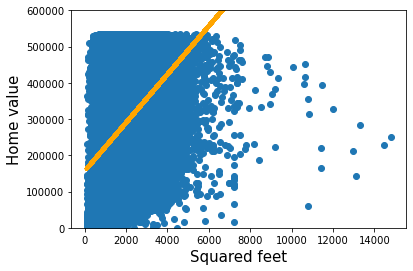

In [160]:
#visualiaze
plt.scatter(X_train.sq_feet, y_train)
#numbers for yhat line are from the results.summary(), coef: const and petal_length
yhat = 66.7197*X_train.sq_feet + 1.562e+05
fig = plt.plot(X_train.sq_feet, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Squared feet', fontsize = 15)
plt.ylabel('Home value', fontsize = 15)
plt.ylim(0, 600_000)
plt.show()

## *Class solution with scaling the data*

In [26]:
df = wr.get_zillow()
train, validate, test = wr.split_zillow(df)
train, _, _, y_train, _, _ = full_split(train, validate, test, 'home_value')

In [27]:
train.head(1)

,id,bedrooms,bathrooms,sq_feet,year_built,tax_amount,fips,county_name
1648005,2282752,4,2.0,1615.0,1970.0,5117.14,6111,Ventura


In [29]:
y_train[:5]

1648005    441974.0
388938     222754.0
127307     309005.0
2030696     85579.0
1011301    364445.0
Name: home_value, dtype: float64

In [30]:
train = train[['sq_feet']]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# create the scaler and fit/transform my square footage column
mms = MinMaxScaler()

train['sq_feet'] = mms.fit_transform(train[['sq_feet']])

In [34]:
train.sq_feet.min(), train.sq_feet.max()

(0.0, 1.0)

In [37]:
model = LinearRegression().fit(train, y_train)
predictions = model.predict(train)

In [38]:
train['home_value'] = y_train
train['yhat'] = predictions
train.head(1)

,sq_feet,home_value,yhat
1648005,0.102918,441974.0,263966.000281


In [40]:
#calculate residuals (acutal - prediction)
train['residuals'] = train.home_value - train.yhat
train.head(1)

,sq_feet,home_value,yhat,residuals
1648005,0.102918,441974.0,263966.000281,178007.999719


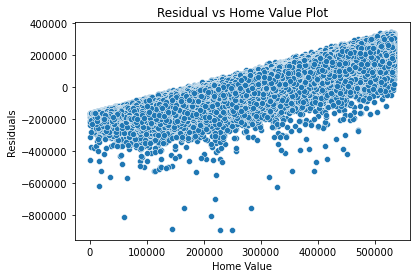

In [42]:
#make scatterplot of y-value vs residuals
sns.scatterplot(data=train, x='home_value', y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

#### MSE - mean squared error

In [44]:
MSE = mean_squared_error(train.home_value, train.yhat)
MSE

17075229377.831577

####  SSE - sum or squared errors

In [45]:
SSE = MSE * len(train)
SSE

1.5344296300571412e+16

#### RMSE - root mean squared eror

In [47]:
RMSE = MSE**.5
RMSE

130672.22114065244

#### ESS - explained sum of squares

In [49]:
ESS = ((train.yhat - train.home_value.mean())**2).sum()
ESS

1317180790705078.5

#### TSS - total sum of squares

In [50]:
TSS = ESS + SSE
TSS

1.666147709127649e+16

In [51]:
train['baseline'] = train.home_value.mean()
train.head(1)

,sq_feet,home_value,yhat,residuals,baseline
1648005,0.102918,441974.0,263966.000281,178007.999719,261793.889946


#### MSE baseline

In [52]:
MSE_baseline = mean_squared_error(train.home_value, train.baseline)
MSE_baseline

18540996441.553165

#### SSE baseline

In [53]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

1.666147709127648e+16

#### RSME baseline

In [54]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

136165.32760417816

In [55]:
if SSE < SSE_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline. :( )')

My OSL model performs better than baseline


#### What is the amount of variance explained in your model? $R^2$ score

In [56]:
#manually
R2 = ESS / TSS
R2

0.0790554632995126

In [58]:
#from sklearn
r2_score(train.home_value, train.yhat)

0.07905546329951185

#### Is your model better than the baseline model?

In [59]:
RMSE_baseline - RMSE

5493.106463525721

it is better, but its still pretty bad and we probably don't want to use it.

**Takeaway** from the evaluation exercise. My $R^2$ score is very low comparing to the one that class scored. Scaling the data didn't help to imporove the $R^2$ score. I need to handle outliers different way.